<a href="https://colab.research.google.com/github/Mrinal19/Representation-Learning/blob/main/Pixel_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving snorlax.jpg to snorlax (2).jpg


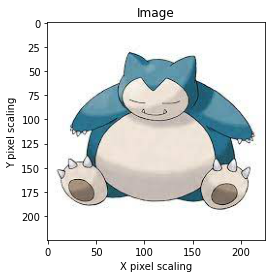

In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from skimage import color
from skimage import io
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixel scaling")
 
image = mpimg.imread("snorlax.jpg")
plt.imshow(image)
plt.show()

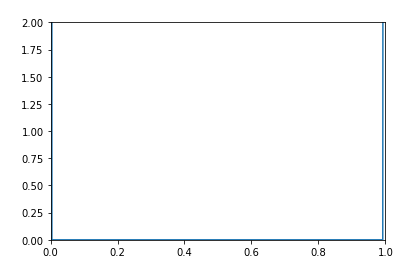

In [ ]:
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

plt.figure()
plt.title("Grayscale Histogram", color = 'white')
plt.xlabel("grayscale value", color = 'white')
plt.ylabel("pixel count", color = 'white')
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 2.0])  

plt.plot(bin_edges[0:-1], histogram)  
plt.show()

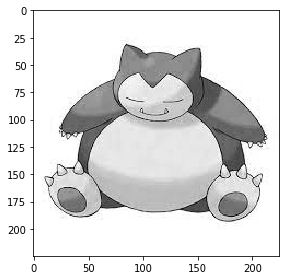

In [ ]:
io.imshow(img)

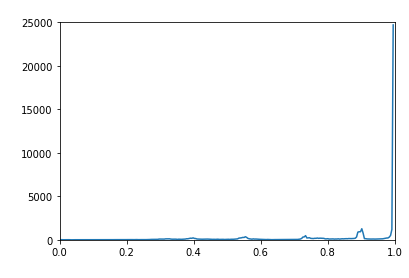

In [ ]:
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))


plt.figure()
plt.title("Grayscale Histogram", color = 'white')
plt.xlabel("grayscale value", color = 'white')
plt.ylabel("pixel count", color = 'white')
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 25000.0])  

plt.plot(bin_edges[0:-1], histogram)  
plt.show()

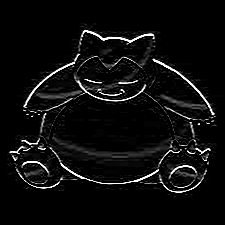

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

sample = cv2.imread("snorlax.jpg", 0)

def conv_transform(image):
  image_copy = image.copy()

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      image_copy[i][j] = image[image.shape[0] - i - 1][image.shape[1] - j - 1]
  return image_copy

def conv(image, kernel):
  # The image will be grayscale, otherwise there will be confusion with 3
    kernel = conv_transform(kernel)
    image_h = image.shape[0]
    image_w = image.shape[1]

    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]

    h = kernel_h//2
    w = kernel_w//2

    image_conv = np.zeros(image.shape)

    for i in range(h, image_h - h):
      for j in range(w, image_w - w):
        sum = 0

        for m in range(kernel_h):
          for n in range(kernel_w):
            sum = (sum + kernel[m][n] * image[i - h + m][j - w + n])

        image_conv[i][j] = sum
    return image_conv

# SOBEL FIELDMAN EDGE DETECTION
def norm(img1, img2):
    img_copy = np.zeros(img1.shape)

    for i in range(img1.shape[0]):
      for j in range(img1.shape[1]):
        q = (img1[i][j] * 2 + img2[i][j] * 2) ** (1/2)
        if(q > 90):
          img_copy[i][j] = 255
        else:
          img_copy[i][j] = 0

      return img_copy
      
kernel = np.zeros(shape = (3,3))
kernel[0, 0] = -1
kernel[0, 1] = -2
kernel[0, 2] = -1
kernel[1, 0] = 0
kernel[1, 1] = 0
kernel[1, 2] = 0
kernel[2, 0] = 1
kernel[2, 1] = 2
kernel[2, 2] = 1
gy = conv(sample, kernel)
cv2_imshow(gy)